# Check my alg results compared to Scipys

In [31]:
# from scipy.cluster.hierarchy import ward, complete, average, weighted, fcluster, dendrogram, linkage
# from scipy.spatial.distance import pdist

from nn_chain_algorithm import nn_chain
from argmin_test import test_nn_chain
from aux_functions import *
# from nn_chain_algorithm_standard import standard_nn_chain, condensed_index

import numpy as np
import matplotlib.pyplot as plt
import time


In [32]:
import random

# Function to create a 2D list of random integers
def create_random_2d_list(rows, cols, min_val, max_val):
    return np.array([[random.randint(min_val, max_val) for _ in range(cols)] for _ in range(rows)])
# # Example usage
# rows = 10
# cols = 10
# min_val = 1
# max_val = 20
# X = create_random_2d_list(rows, cols, min_val, max_val)

In [33]:
X = np.array([[10, 10], [6,3], [13,17.5], [17,15], [1, 12.5], [0,3], [19,15], [13,20.5]])

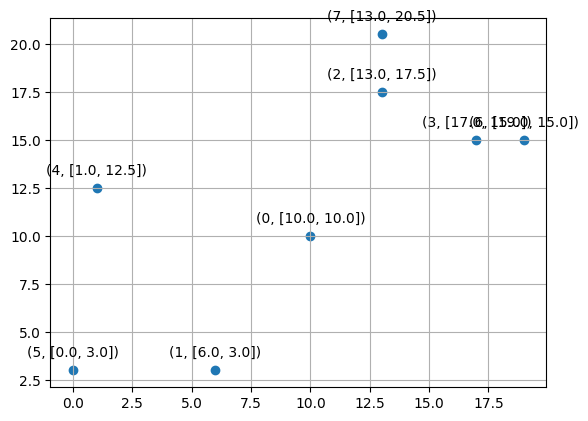

In [34]:
plt.scatter(X[:, 0], X[:, 1])
for i, c in enumerate(X):

    label = i, list(c)

    plt.annotate(label,
                 (c),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.grid()
plt.show()

In [35]:
A = nn_chain(X, 3)

x = 0
knn of x = (array([0, 0, 0]), True)
condition of size of all knns of x = (array([1, 1, 1], dtype=int32), False)
all distances to x = [inf, 4.031128874149275, 4.038873605350878, 4.301162633521313, 4.670385423067351, 6.103277807866851, 5.1478150704935, 5.460082416960389]
original y = 1
knn[x] = [1 2 3]
dists = [4.03112887 4.03887361 4.30116263]
y = 1

x = 1
knn of x = (array([0, 0, 0]), True)
condition of size of all knns of x = (array([1, 1, 1], dtype=int32), False)
all distances to x = [4.031128874149275, inf, 8.050621094052309, 8.139410298049853, 5.367727638395972, 3.0, 8.845903006477066, 9.424038412485382]
original y = 5
knn[x] = [5 0 4]
dists = [3.         4.03112887 5.36772764]
y = 5

x = 5
knn of x = (array([0, 0, 0]), True)
condition of size of all knns of x = (array([1, 1, 1], dtype=int32), False)
all distances to x = [6.103277807866851, 3.0, 9.737171047075224, 10.404326023342406, 4.7762432936357, inf, 11.236102527122116, 10.90011467829582]
original y = 1
knn[x] = [1 4 0]


In [36]:
B = test_nn_chain(X, 3)

UnboundLocalError: local variable 'X' referenced before assignment

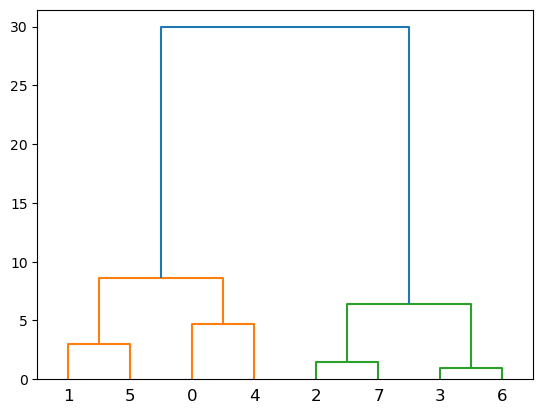

In [6]:
dendrogram(A)
plt.show()

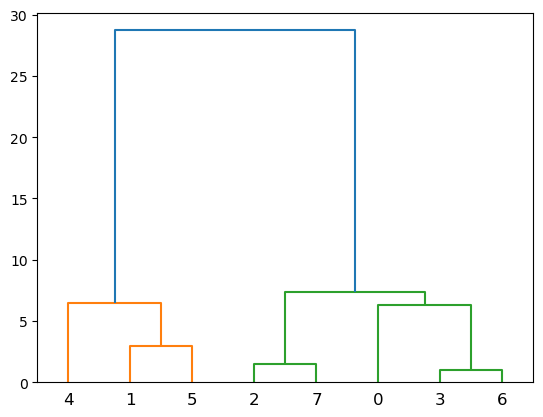

In [7]:
dendrogram(B)
plt.show()

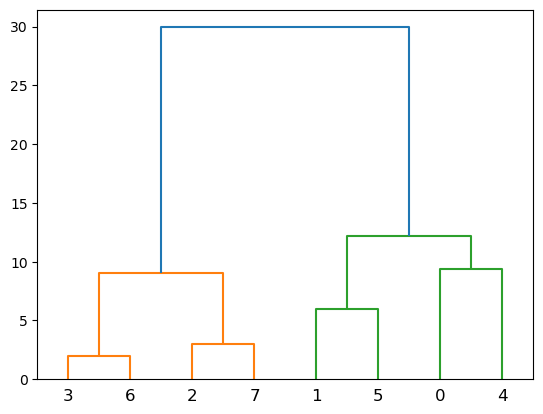

In [8]:
y = pdist(X) 
Z = ward(y)

dendrogram(Z)
plt.show()

In [1]:
import numpy as np
from aux_functions import *

In [22]:
def dist_calculation(i, targets, size, X):
    if targets.size:
        return np.array([ward(size[i], size[t], X[i], X[t]) for t in targets])
    else:
        return np.array([])

In [24]:
mapping = np.full((2*2-1), np.inf)
w = np.array([])

In [65]:
X = np.array([[10, 10], [6,3], [13,17.5], [17,15], [1, 12.5], [0,3], [19,15], [13,20.5]])
active = {i for i, _ in enumerate(X)}

In [2]:
import numpy as np

In [8]:
knn = []
# knn[-1] = np.array([11, 9])

In [10]:
knn

[array([3, 4, 9])]

In [9]:
knn.append(np.array([3, 4, 9]))

In [20]:
np.array(np.append(p[:m], p[m+1:]))

array([1, 3, 4, 5])

In [27]:
# User Input
X = np.array([[10, 10], [6,3], [13,17.5], [17,15], [1, 12.5], [0,3], [19,15], [13,20.5]])
k = 3

# Init
n = len(X)
size = np.ones(n, dtype=np.intc)

active = {i for i, _ in enumerate(X)}
_active = [True for _ in X]

knn = []#np.empty((0,k), int)
knn_dist = []#np.empty((0,k), float)
mapping = np.full((2*n-1), np.inf)

cluster_chain = np.empty(0, dtype=np.intc)
chain_length = 0

B = np.empty((0,4), int)

# Activate loop
while active:

    if len(active) == 1:
        break
    
    # New chain
    if chain_length == 0:
        print("STARTING NEW CHAIN")
        i = next(iter(active))
        cluster_chain = np.append(cluster_chain, i)

        chain_length = 1 # Do i still need this variable ?
        _dists = wrapper_ward(i, size, X)
        _knn, _knn_dist = get_top_k(_dists, k)
        knn = np.vstack([knn, _knn])
        knn_dist = np.vstack([knn_dist, _knn_dist])

    while cluster_chain.size:
        print("------------")
        print(f"cluster_chain = {cluster_chain}, chain_length = {chain_length} ==> {cluster_chain[chain_length-1]}")
        i = cluster_chain[chain_length - 1]
        print(f"knn = {knn[-1]}, dists = {knn_dist[-1]}")

        m = 0
        ind = 1

        for index, nn in enumerate(knn[-1]):
            print(f"checking active of NN = {nn}")
            if _active[nn]:
                m = index
                ind = 0
                break
        print(f"m  = {m}")
        if ind:
            _dists = wrapper_ward(i, size, X)
            knn[-1], knn_dist[-1] = get_top_k(_dists, k)

        if knn[-1][:m].size:
            _knn = np.array(list(set(mapping[knn[-1][:m]])), dtype=int)
            print(f"there are un-updated NN: {knn[-1][:m]} => {_knn}")
            print(f"replacing {knn[-1]}")
            knn[-1] = np.array(np.append(_knn, knn[-1][m:]))
            knn_dist[-1] = np.array(np.append(dist_calculation(i, _knn, size, X), knn_dist[-1][m:]))

        j = knn[-1][np.argmin(knn_dist[-1])]
        print(f"i = {i}, j = {j}")

        if chain_length > 1 and j == cluster_chain[chain_length - 2]:
            break

        cluster_chain = np.append(cluster_chain, j)
        chain_length += 1
        _dists = wrapper_ward(j, size, X)
        _knn, _knn_dist = get_top_k(_dists, k)
        knn = np.vstack([knn, _knn])
        knn_dist = np.vstack([knn_dist, _knn_dist])
    print()
    print(f"merging {i, j}")
    # Merging i and j
    chain_length -= 2

    size_xy = size[i] + size[j]

    # Record the new node
    B = np.vstack([B, [i, j, min(knn_dist[-1]), size_xy]])

    ij_centroid = (size[i] * X[i] + size[j] * X[j] ) / ( size_xy )
    X = np.vstack([X, ij_centroid])
    
    size[i] = 0
    size[j] = 0
    size = np.append(size, size_xy)

    new_index = len(X) - 1

    mapping[i] = new_index
    mapping[j] = new_index
    mapping = np.array([new_index if m == i or m == j else m for m in mapping])
    print(f"mapping = {mapping}")

    active.remove(i)
    active.remove(j)
    active.add(new_index)

    _active[i] = False
    _active[j] = False
    _active = np.append(_active, True)
    print(f"active ? {_active}")

    cluster_chain = cluster_chain[:-2]
    knn = knn[:chain_length]
    knn_dist = knn_dist[:chain_length]

    print()
    print()

STARTING NEW CHAIN
------------
cluster_chain = [0], chain_length = 1 ==> 0
knn = [1 2 3], dists = [4.03112887 4.03887361 4.30116263]
checking active of NN = 1
m  = 0
i = 0, j = 1
------------
cluster_chain = [0 1], chain_length = 2 ==> 1
knn = [5 0 4], dists = [3.         4.03112887 5.36772764]
checking active of NN = 5
m  = 0
i = 1, j = 5
------------
cluster_chain = [0 1 5], chain_length = 3 ==> 5
knn = [1 4 0], dists = [3.         4.77624329 6.10327781]
checking active of NN = 1
m  = 0
i = 5, j = 1

merging (5, 1)
mapping = [inf  8. inf inf inf  8. inf inf inf inf inf inf inf inf inf]
active ? [ True False  True  True  True False  True  True  True]


------------
cluster_chain = [0], chain_length = 1 ==> 0
knn = [1 2 3], dists = [4.03112887 4.03887361 4.30116263]
checking active of NN = 1
checking active of NN = 2
m  = 1
there are un-updated NN: [1] => [8]
replacing [1 2 3]
i = 0, j = 2
------------
cluster_chain = [0 2], chain_length = 2 ==> 2
knn = [7 3 6], dists = [1.5        2.

In [30]:
B

array([[ 5.        ,  1.        ,  3.        ,  2.        ],
       [ 7.        ,  2.        ,  1.5       ,  2.        ],
       [ 3.        ,  6.        ,  1.        ,  2.        ],
       [ 4.        ,  0.        ,  4.67038542,  2.        ],
       [ 9.        , 10.        ,  6.40312424,  4.        ],
       [ 8.        , 11.        ,  8.62046982,  4.        ],
       [12.        , 13.        , 29.93847859,  8.        ]])

In [25]:
from scipy.cluster.hierarchy import dendrogram

NameError: name 'plt' is not defined

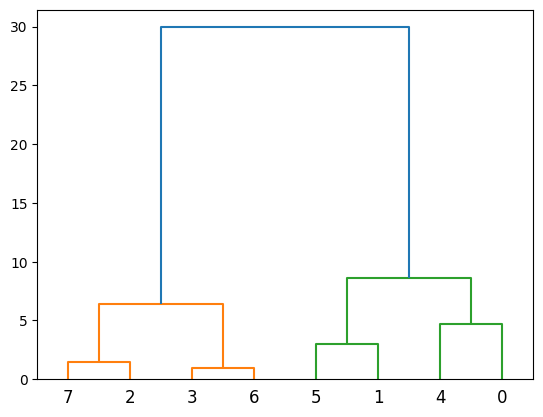

In [29]:
dendrogram(B)
plt.show()

In [8]:
_active[0]

True

In [55]:
knn

array([[1, 2, 3],
       [5, 0, 4],
       [7, 3, 6],
       [6, 2, 7],
       [0, 5, 1],
       [1, 4, 0],
       [3, 2, 7]])

In [24]:
i = active.pop()

In [37]:
A = {1, 2, 3}

In [38]:
while A:
    if len(A) == 1:
        break
    print("hi")
    A.pop()


hi
hi


In [39]:
A

{3}